USING SNS

/tmp/ipykernel_33562/345591795.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data,x="BMI",palette='deep')


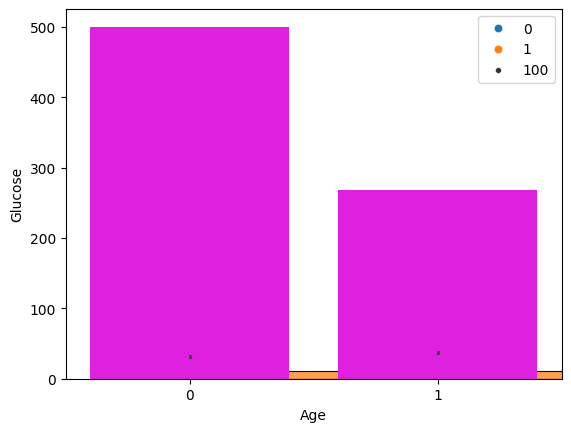

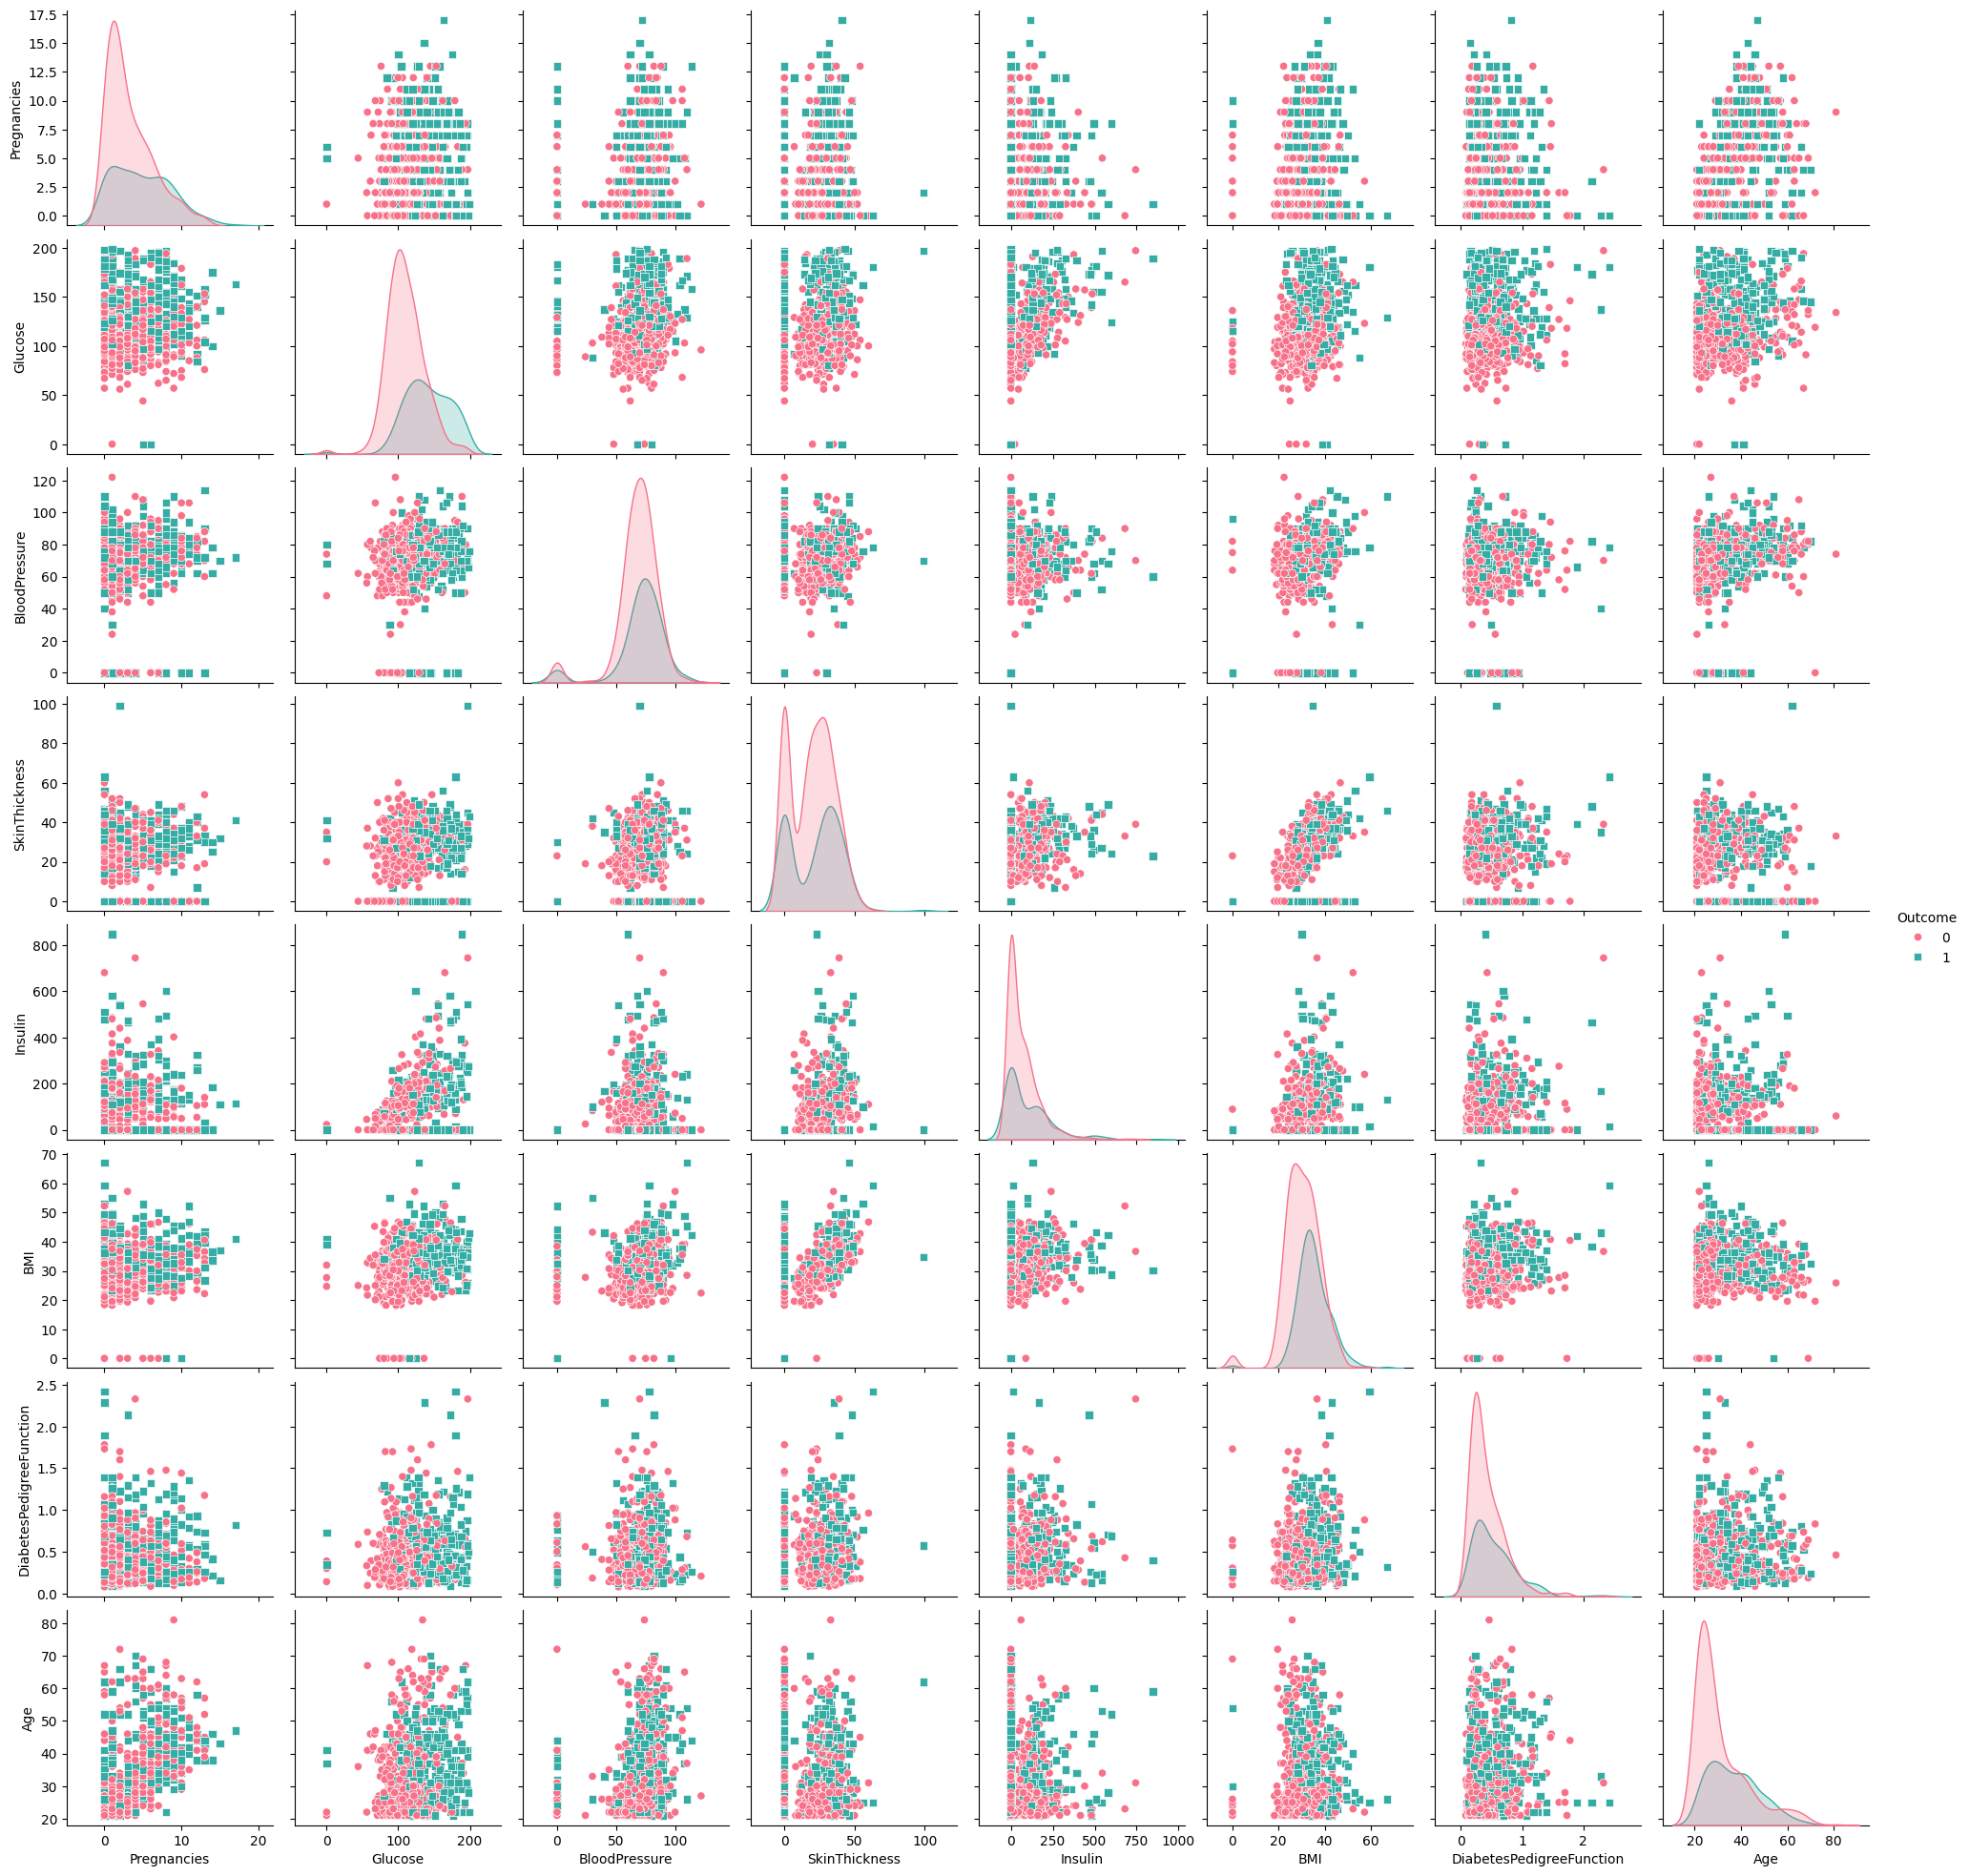

In [9]:
import seaborn as sns
import pandas as pd

data=pd.read_csv('/workspaces/codespaces-jupyter/data/diabetes.csv')

sns.scatterplot(data=data,x='Age',y='Glucose',hue='Outcome',size=100,marker='o')
sns.histplot(data=data,x="BMI",palette='deep')
sns.lineplot(data=data,x="Age",y="BMI",color='green',linestyle='dashed')
sns.barplot(data=data,x='Outcome',y='Age',color='pink')
sns.countplot(data=data,x="Outcome",color='magenta')
sns.pairplot(data=data,hue='Outcome',palette='husl',markers=['o','s'])

USING PANDAS

In [22]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [108]:
import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker()
np.random.seed(42)

# Generating the dataset
data = {
    "Review_ID": range(1, 501),
    "User_Name": [fake.name() for _ in range(500)],
    "Review_Text": [fake.sentence(nb_words=10) for _ in range(500)],
    "Rating": np.random.randint(1, 6, size=500),  # Ratings from 1 to 5
    "Sentiment": np.random.choice(["Positive", "Negative", "Neutral"], size=500, p=[0.5, 0.3, 0.2]),
    "Length_of_Review": [len(fake.sentence(nb_words=10)) for _ in range(500)],  # Review text length
    "Category": np.random.choice(["Electronics", "Books", "Clothing", "Groceries"], size=500),
    "Price": np.random.uniform(10, 1000, size=500).round(2),  # Product price
    "Purchase_Date": [fake.date_between(start_date="-3y", end_date="today") for _ in range(500)],
    "Null_Column": [np.nan if i % 7 == 0 else fake.word() for i in range(500)],  # Adding NaN values
}

df = pd.DataFrame(data)
df.to_csv("sentiment_analysis_dataset.csv", index=False)
print("Sentiment analysis dataset created successfully.")



Sentiment analysis dataset created successfully.


In [13]:
import pandas as pd
import numpy as np

#load the csv file
df=pd.read_csv('/workspaces/codespaces-jupyter/data/sentiment_analysis_dataset.csv')
# print(df.head(10))
#find the shape
print(df.shape)
print(df.columns)
print(df.dtypes)
# print(df.describe())

(500, 10)
Index(['Review_ID', 'User_Name', 'Review_Text', 'Rating', 'Sentiment',
       'Length_of_Review', 'Category', 'Price', 'Purchase_Date',
       'Null_Column'],
      dtype='object')
Review_ID             int64
User_Name            object
Review_Text          object
Rating                int64
Sentiment            object
Length_of_Review      int64
Category             object
Price               float64
Purchase_Date        object
Null_Column          object
dtype: object


In [110]:
#3. Check for missing values in the dataset.
print(df.isnull().sum())

Review_ID            0
User_Name            0
Review_Text          0
Rating               0
Sentiment            0
Length_of_Review     0
Category             0
Price                0
Purchase_Date        0
Null_Column         72
dtype: int64


In [111]:
#5. Find the distribution of sentiments.
print(df['Sentiment'].value_counts())

Sentiment
Positive    257
Negative    142
Neutral     101
Name: count, dtype: int64


In [22]:
#6. Select only the Review_Text, Rating, and Sentiment columns.
subset=df[['Review_Text','Rating','Sentiment']]
print(subset.head())

#while creatng a new df only u use 
# data = {'Review_Text': ['Good', 'Bad'], 'Rating': [5, 2], 'Sentiment': ['Positive', 'Negative'], 'Date': ['2023-01-01', '2023-01-02']}
# new_df = pd.DataFrame(data,columns=['Review_Text', 'Rating', 'Sentiment'])
# print(new_df)

                                         Review_Text  Rating Sentiment
0               Smile study way before thank season.       4  Negative
1  Family professor matter politics feel since re...       5   Neutral
2  Attention beautiful customer official popular ...       3  Positive
3  Lawyer manager may performance spend last citi...       5   Neutral
4             Stop kitchen still event company near.       5  Positive


In [24]:
#7. Filter rows where Sentiment is Positive and Rating is 5.
# filtered=df[(df['Sentiment']=='Positive') & (df['Rating']==4)]
# print(filtered)

#Find reviews of products in the Books category with prices > 500
filtered_2=df[(df['Category']=='Books') & (df['Price']>500)]
print(filtered_2['Review_Text'])

#9. Retrieve all rows where the Null_Column is NaN.
# filtered_3=df[df['Null_Column'].isnull()]
# filtered_3=df[pd.isna(df['Null_Column'])]
# print(filtered_3)

5      Site nothing offer share see me reveal public ...
6      Air federal mean me must also above she senior...
14     Reach structure themselves several father real...
22     Leave before left window civil maintain draw m...
24        Central put without hard attack step continue.
                             ...                        
459    On various without difficult herself parent tr...
460    Can bill beyond guy soldier power attack show ...
473    Three focus in political cost mission six clos...
480    Might chance middle move agree game central fa...
486    Glass sure newspaper spend culture traditional...
Name: Review_Text, Length: 74, dtype: object


In [114]:
#11. Drop the Null_Column.
# df.head()
# df.drop(columns='Null_Column')
# print(df.head())

# #12. Replace missing values in Null_Column with "Unknown".
# df['Null_Column']=df['Null_Column'].fillna('Unknown')
# print(df['Null_Column'])


# #13. Rename Length_of_Review to Review_Length.
# df.rename(columns={'Length_of_Review':'Review_Length'},inplace=True)
# df.describe()

#14. Replace all Neutral sentiments with Mixed.
df['Sentiment'].replace('Neutral','Mixed')
print(df)

     Review_ID            User_Name  \
0            1         Stephen Shaw   
1            2      Courtney Miller   
2            3       William Harris   
3            4        Marco Vasquez   
4            5    Christine Schmidt   
..         ...                  ...   
495        496         Tricia Colon   
496        497         John Goodwin   
497        498         Brandon Hill   
498        499    Christopher Ayala   
499        500  Stephanie Whitehead   

                                           Review_Text  Rating Sentiment  \
0                 Smile study way before thank season.       4  Negative   
1    Family professor matter politics feel since re...       5   Neutral   
2    Attention beautiful customer official popular ...       3  Positive   
3    Lawyer manager may performance spend last citi...       5   Neutral   
4               Stop kitchen still event company near.       5  Positive   
..                                                 ...     ...       ...   

In [135]:
print(type(df))

#2. Convert the Series to a DataFrame
# df = df.to_frame() 
# print(type(df))
# print(df.head())
# 1. Iterating Through Rows
# for index,row in df.iterrows():
#     print(f"{index}----------------{row}")

# Column Names:
for col in df.columns:
    print(f"{col}")


<class 'pandas.core.frame.DataFrame'>
Review_ID
User_Name
Review_Text
Rating
Sentiment
Length_of_Review
Category
Price
Purchase_Date
Null_Column
newcolumn
new_column


In [ ]:
df.dropna(axis=0,how='any',inplace=True)
df.shape

(428, 10)

In [123]:
#Fill Missing Values
df['Price'].fillna(df['Price'].mean())


1      683.34
2      622.43
3      755.19
4      167.02
5      882.06
        ...  
494    136.44
495    827.81
496    784.21
498     45.80
499    310.10
Name: Price, Length: 428, dtype: float64

In [133]:
#Apply Function
df['new_column']=np.nan
df['new_column']=df['Review_ID'].apply(lambda x:'Positive' if x%2==0 else 'Negative')
print(df[['Review_ID','new_column']])

     Review_ID new_column
1            2   Positive
2            3   Negative
3            4   Positive
4            5   Negative
5            6   Positive
..         ...        ...
494        495   Negative
495        496   Positive
496        497   Negative
498        499   Negative
499        500   Positive

[428 rows x 2 columns]


In [139]:
#One-Hot Encoding
df_encoded=pd.get_dummies(df,columns=['Category','Sentiment'])
print(df_encoded.columns)

Index(['Review_ID', 'User_Name', 'Review_Text', 'Rating', 'Length_of_Review',
       'Price', 'Purchase_Date', 'Null_Column', 'newcolumn', 'new_column',
       'Category_Books', 'Category_Clothing', 'Category_Electronics',
       'Category_Groceries', 'Sentiment_Negative', 'Sentiment_Neutral',
       'Sentiment_Positive'],
      dtype='object')


In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df_encoded[['Price','Length_of_Review']]=scaler.fit_transform(df_encoded[['Price','Length_of_Review']])

print(df_encoded[['Price','Length_of_Review']])

        Price  Length_of_Review
1    0.678953          0.420290
2    0.617086          0.637681
3    0.751932          0.565217
4    0.154520          0.913043
5    0.880796          0.623188
..        ...               ...
494  0.123460          0.304348
495  0.825693          0.434783
496  0.781408          0.710145
498  0.031396          0.695652
499  0.299849          0.797101

[428 rows x 2 columns]


In [ ]:
#2. loc (Label-based indexing)

#df.loc[row_label, column_label]
print(df.index)  #-gives you the row labels available

df.loc[df.index,'Price']



Index([  1,   2,   3,   4,   5,   6,   8,   9,  10,  11,
       ...
       488, 489, 491, 492, 493, 494, 495, 496, 498, 499],
      dtype='int64', length=428)


1      683.34
2      622.43
3      755.19
4      167.02
5      882.06
        ...  
494    136.44
495    827.81
496    784.21
498     45.80
499    310.10
Name: Price, Length: 428, dtype: float64

In [155]:
#1. iloc (Integer Location-based indexing)
#df.iloc[row_index, column_index]

df.iloc[0:2,0:2]

,Review_ID,User_Name
1,2,Courtney Miller
2,3,William Harris


USING MATPLOTLIB VISUALISATIONS

In [26]:
# 1. Line Plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('/workspaces/codespaces-jupyter/data/HistoricalPrices.csv')

# Display the first few rows of the dataset
df.head()
df= df.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})

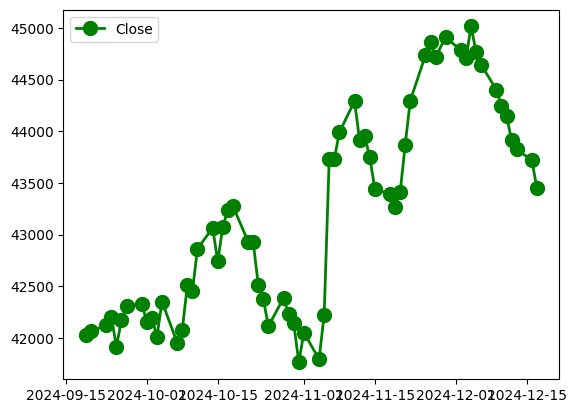

In [29]:
#LINEPLOT
#Line Plot:
#Plot the trend of Sales over the months.
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date')
plt.plot(df['Date'],df['Close'],color='green',marker='o',markersize=10,linestyle='-',linewidth=2,label='Close')

plt.legend() #you need to guve label='Close' for legend 

plt.show()

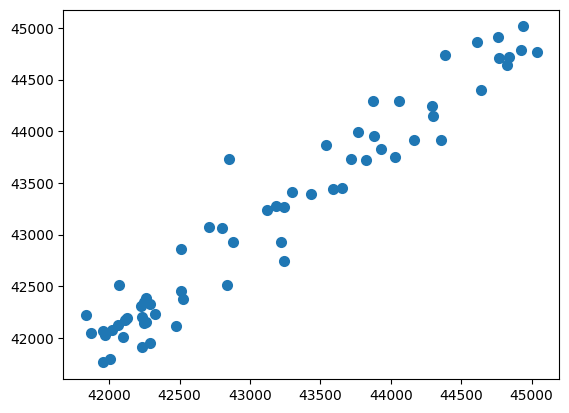

In [31]:
#SCATTERPLOT
plt.scatter(df['Open'],df['Close'],marker='o',linewidth=2)

<BarContainer object of 63 artists>

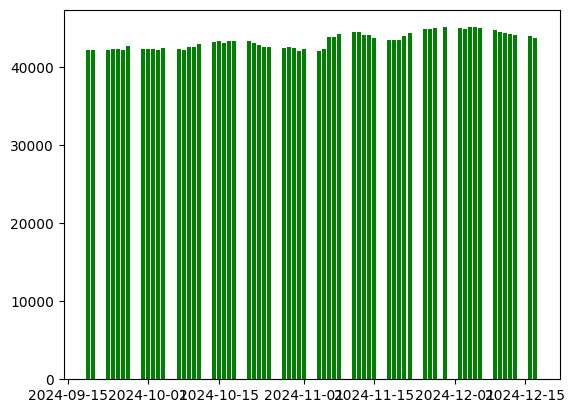

In [174]:
plt.bar(df['Date'], df['High'], color='green')

(array([ 9., 14.,  3.,  4.,  5.,  4., 10.,  4.,  2.,  8.]),
 array([41763.46 , 42088.518, 42413.576, 42738.634, 43063.692, 43388.75 ,
        43713.808, 44038.866, 44363.924, 44688.982, 45014.04 ]),
 <BarContainer object of 10 artists>)

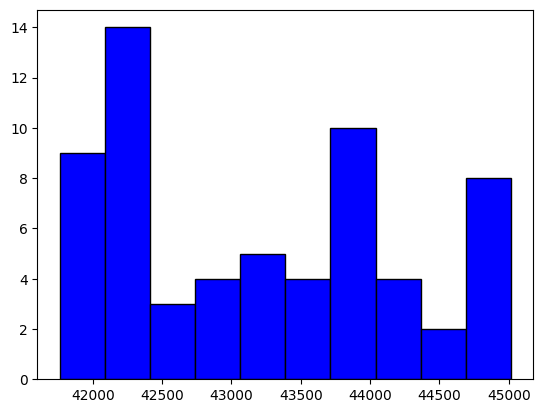

In [35]:
#histogram
plt.hist(df['Close'],bins=10,color='blue',edgecolor='black')

USING NUMPY

In [13]:
#How do you create a NumPy array?
import numpy as np

array1=np.array([1,2,3,4])
print(array1)

array2=np.arange(0,15)
print(array2)

#How do you create a 2D array in NumPy?
array3=np.array([[1,2,3],[4,5,6]])
print(array3)


#to find the shape and sze of the array

print(array3.shape)
print(array3.size)

#How do you sum all elements of a NumPy array?
print(f"Sum of elements:{np.sum(array3)}")

#How do you find the sum of elements along a specific axis (e.g., rows or columns) in a 2D array?
print(f"Sum of elements along the col:{np.sum(array3,axis=0)}") #axis=0 sum across column
print(f"Sum of elements along the row:{np.sum(array3,axis=1)}") #axis=1 sum across row
print(np.mean(array3))
print(np.std(array3))
print(np.var(array3))

[1 2 3 4]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[[1 2 3]
 [4 5 6]]
(2, 3)
6
Sum of elements:21
Sum of elements along the col:[5 7 9]
Sum of elements along the row:[ 6 15]
3.5
1.707825127659933
2.9166666666666665


In [17]:
print(np.zeros((3, 3)))  # 3x3 array of zeros
print(np.ones((2, 2)))   # 2x2 array of ones

# How do you generate a random 3x3 matrix of integers between 0 and 10?

array4=np.random.randint(0,10,size=(3,3))
print(array4)


#How do you create a random 3D array with specific dimensions (e.g., 4x3x2)?
array5=np.random.random((4,3,2))
print(array5)


print(np.sort(array4, axis=0))  # Sort along rows (vertically)
print(np.sort(array4, axis=1))  # Sort along columns (horizontally)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]]
[[1 3 4]
 [6 9 6]
 [9 6 3]]
[[[0.95944214 0.47337123]
  [0.15652927 0.55148863]
  [0.46848862 0.02419345]]

 [[0.0766375  0.21353808]
  [0.06795326 0.08147204]
  [0.85382152 0.59928983]]

 [[0.04240953 0.62526502]
  [0.00587939 0.23852826]
  [0.90961675 0.39834063]]

 [[0.84894777 0.68384646]
  [0.60057213 0.78653722]
  [0.3066121  0.28019722]]]
[[1 3 3]
 [6 6 4]
 [9 9 6]]
[[1 3 4]
 [6 6 9]
 [3 6 9]]


USING NUMPY

In [1]:
#Create a NumPy array from a Python list or tuple:
import numpy as np
array_from_list=np.array([1,2,3,4])
array_from_tuple=np.array((1,2,3,4))
print(array_from_list)
print(array_from_tuple)

print(array_from_list.shape) #no of rows,no of columns
print(array_from_list.ndim) #no of dimensions
print(array_from_list.dtype) #-datatype of elements
print(array_from_list.size)#-no o flements

#Reshape a 1D array into 2D or 3D:
array=np.arange(12)
array_2d=array.reshape(3,4)
array_3d=array.reshape(3,2,2)
print(array_2d.shape)
print(array_3d.shape)

# Access elements, rows, and columns in a 2D array:
print(array_2d[:,2])



#all operations
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])
print(array1 + array2)   # [5, 7, 9]
print(array1 - array2)   # [-3, -3, -3]
print(array1 * array2)   # [4, 10, 18]
print(array1 / array2)   # [0.25, 0.4, 0.5]


# Compute dot product between two matrices:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(np.dot(A,B))


arr1 = np.array([[[1, 2]], [[3, 4]]])
arr2 = np.array([[1, 2], [3, 4]])

print(arr1.shape)
print(f"{arr1[0]}:{arr1.shape[0]}")  
print(arr2.shape)  # Output: (2, 2)


#Broadcast a smaller array:
A = np.array([[1, 2], [3, 4]])
b = np.array([10, 20]) #-shape will be (2,)
print(b.shape)
print(A + b)  # [[11, 22], [13, 24]]

#Compute the transpose of a matrix:
A=np.array([[1,2],[3,4]])
print(A.T)

#Flatten a multi-dimensional array:
A=np.array([[1,2],[3,4]])
print(A.flatten().shape)

[1 2 3 4]
[1 2 3 4]
(4,)
1
int64
4
(3, 4)
(3, 2, 2)
[ 2  6 10]
[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]
[[19 22]
 [43 50]]
(2, 1, 2)
[[1 2]]:2
(2, 2)
(2,)
[[11 22]
 [13 24]]
[[1 3]
 [2 4]]
(4,)


In [36]:
import pandas as pd
#Concatenate two arrays:
A=np.array([[1,2],[3,4]])
B=np.array([[5,6]])
print(np.concatenate((A,B),axis=0))
print(np.concatenate((A.T, B.T), axis=1))

#Mean, median, and mode:
array = np.array([1, 2, 3, 3, 4])
print(np.mean(array))   # 2.6
print(np.median(array))  # 3.0
print(np.std(array))
print(np.var(array))


#normalising the array mean/std
array_normalised=(array-np.mean(array))/np.std(array)
print(array_normalised)

#min
print(np.min(array_normalised))
print(np.argmin(array_normalised)) #Purpose: It returns the index (or indices) of the smallest value in the array or along a specified axis.

#Percentiles:
print(np.percentile(array,50))

indices = [0, 2, 4]
print(array[indices])  # [1, 3, 4]

#Uniform random numbers:
print(np.random.rand(3,3))

#Normal distribution:
print(np.random.randn(3,3))

#Random integers:
print(np.random.randint(0,10,(3,3)))

print(np.unique((array),return_counts=True))


#df to numpy
data = {'A': [1, 2, 3], 'B': [4, 5, 6], 'C': [7, 8, 9]}
df = pd.DataFrame(data)
numpyarr=df.to_numpy()
print(numpyarr)


zeros = np.zeros((3, 3))  # 3x3 array of zeros
ones = np.ones((2, 4))    # 2x4 array of ones
print(zeros)
print(ones)


arange = np.arange(1, 10, 1)  # [1, 3, 5, 7, 9]
linspace = np.linspace(2, 10, 5)   #here 5 represents the no of evenly spaced samples to generate
print(arange)
print(linspace)

array=np.array([1,2,3,4])
split = np.split(array, 2, axis=0)
print(split)


[[1 2]
 [3 4]
 [5 6]]
[[1 3 5]
 [2 4 6]]
2.6
3.0
1.019803902718557
1.0400000000000003
[-1.56892908 -0.58834841  0.39223227  0.39223227  1.37281295]
-1.5689290811054721
0
3.0
[1 3 4]
[[0.51648605 0.54066485 0.55540799]
 [0.81573526 0.09066495 0.3790678 ]
 [0.88693426 0.29416871 0.66577233]]
[[-2.92462240e-01 -1.28752464e+00  3.01985588e-05]
 [-1.42679583e+00  2.44666713e-01  5.15791966e-01]
 [-4.66569432e-01  4.85891351e-01 -6.13939969e-01]]
[[1 0 8]
 [9 3 9]
 [1 2 8]]
(array([1, 2, 3, 4]), array([1, 1, 2, 1]))
[[1 4 7]
 [2 5 8]
 [3 6 9]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
[1 2 3 4 5 6 7 8 9]
[ 2.  4.  6.  8. 10.]
[array([1, 2]), array([3, 4])]
